In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# import sys
# sys.path.append('/content/gdrive/MyDrive/PROJECTS/gan')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
DATA_DIR = 'D:\\DATASETS\\Pokemon\\large\\64x64'
RESULT_DIR = 'C:\\Users\\Tom\\OneDrive\\DATA\\Master\\DeepLearningArchitectures\\GenerativeAdversarialNetworks\\src\\experiments\\pokemon\\results'

In [7]:
import tensorflow as tf

dataset = tf.keras.utils.image_dataset_from_directory(
    directory='D:\\DATASETS\\Pokemon\\large\\64x64',
    #labels = len(os.listdir(DATA_DIR)) * [1],
    label_mode=None,
    color_mode='rgb',
    batch_size=64,
    image_size=(64,64),
    shuffle=True,
    seed=42,
    ).map(
        lambda x: x/(255/2) - 1 # rescale into interval [-1, 1]
    ).map(
        lambda x: (x, tf.constant([])) # add dummy label
    )

# virtual_batch, _ = dataset.rebatch(256).as_numpy_iterator().next()

Found 2503 files belonging to 1 classes.


Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 1, 100)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 4, 4, 1024)       1638400   
 nspose)                                                         
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 1024)       4096      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4, 4, 1024)        0         
                                                                 
 cnn_block_1 (Sequential)    (None, 8, 8, 512)         13109248  
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| conv2d_transpose_1 (Conv2DT  (None, 8, 8, 512)      131

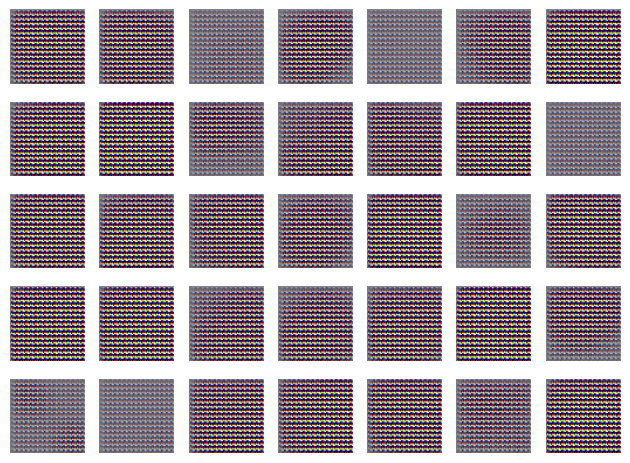

Epoch 1/100
22/40 [===============>..............] - ETA: 5:05 - Cross-Entropy: 2.0030 - E[p(y=real|x=real)]: 0.7293 - E[p(y=fake|x=fake)]: 0.8470 - Historical-Averaging-Penalty: 11.0091

KeyboardInterrupt: 

In [13]:
import sys
import os
sys.path.append(os.path.join(os.pardir, os.pardir))

from experiments.pokemon.architecture import generator, discriminator
from experiments.pokemon.training import run_training
from experiments.utils import VisualizeGeneratedFakesCallback
from gan import GenerativeAdversarialNetwork

z_shape=generator.input_shape[1:]
x_shape=discriminator.input_shape[1:]

gan = GenerativeAdversarialNetwork(generator, discriminator, z_shape, x_shape, k=1,
                                   label_smooting=(0, 0.9),
                                   historical_averaging=True,
                                   feature_matching_idx=3,
                                  #  virtual_normalization_batch=virtual_batch
                                   )
gan.summary()

gan.compile(optimizer_discriminator=tf.keras.optimizers.Adam(learning_rate=0.00275, beta_1=0.5),
            optimizer_generator=tf.keras.optimizers.Adam(learning_rate=0.00275, beta_1=0.5))
callbacks=[VisualizeGeneratedFakesCallback(z_distribution=gan.z_distribution, save_dir=RESULT_DIR)]
gan.fit(x=dataset, callbacks=callbacks, epochs=100)